In [20]:
!pip install tensorflow torch matplotlib

In [151]:
import os

In [3]:
from copy import copy

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [5]:
import torch
from torchvision import datasets , transforms
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
import torch.nn as nn

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [127]:
path = "/content/drive/MyDrive/compvision/raw-img"
classes = os.listdir(path)

In [128]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant",
             "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat",
             "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "ragno": "spider"}

In [129]:
for category in classes:
    category_path = os.path.join(path, category)
    if os.path.isdir(category_path):
        eng_name = translate.get(category, category)
        eng_path = os.path.join(path, eng_name)
        if eng_name != category:
            os.rename(category_path, eng_path)

In [130]:
transform_data_train = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_data_test = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [136]:
full_dataset = datasets.ImageFolder(root=path)
print(full_dataset)

Dataset ImageFolder
    Number of datapoints: 26182
    Root location: /content/drive/MyDrive/compvision/raw-img


In [148]:
def count_items_classes(dataset):
    class_counts = {class_name: 0 for class_name in dataset.classes}

    for _, label in dataset.samples:
        class_counts[dataset.classes[label]] += 1

    return class_counts

In [146]:
num_of_items = count_items_classes(full_dataset)
print(num_of_items)

{'butterfly': 2112, 'cat': 1668, 'chicken': 3098, 'cow': 1866, 'dog': 4863, 'elephant': 1446, 'horse': 2623, 'sheep': 1820, 'spider': 4824, 'squirrel': 1862}


In [145]:
def plot_class_distribution(class_counts):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(10, 5))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Num')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

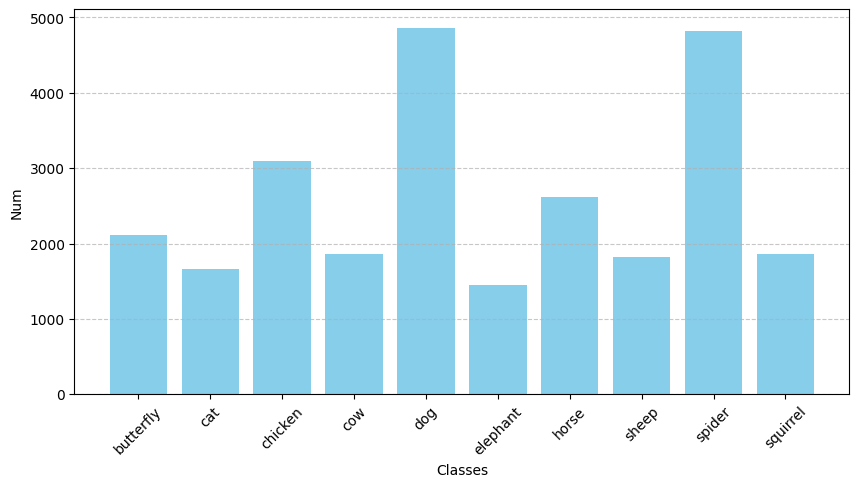

In [147]:
plot_class_distribution(num_of_items)

In [138]:
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_data, test_data = random_split(full_dataset, [train_size,  test_size])
train_data.dataset = copy(full_dataset)

In [139]:
train_data.dataset.transform = transform_data_train
test_data.dataset.transform = transform_data_test

In [140]:
train_size = int(0.9 * len(train_data))
val_size = len(train_data) - train_size
train_data, val_data = random_split(train_data, [train_size,  val_size])

18850
2095


In [141]:
print(f"Train ds: ", len(train_data))
print(f"Val ds: ", len(val_data))
print(f"Test ds: ", len(test_data))

Train ds:  18850
Val ds:  2095
Test ds:  5237


In [109]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

In [110]:
def show_images(data, classes, num_images=10):
    data_iter = iter(data)
    samples = [next(data_iter) for _ in range(16)]
    rows = int(np.sqrt(num_images))
    cols = int(np.ceil(num_images / rows))

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    axes = axes.flatten()

    for ax, (image, label) in zip(axes, samples):
        plt.sca(ax)
        imshow(image)
        ax.set_title(classes[label], fontsize=10)
        ax.axis("off")

    plt.show()

In [21]:
def plot_class(class_counts, dataset):
    plt.figure(figsize=(10, 5))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.xlabel("Classes")
    plt.ylabel("Num")
    plt.title(dataset)
    plt.xticks(rotation=45)
    plt.show()

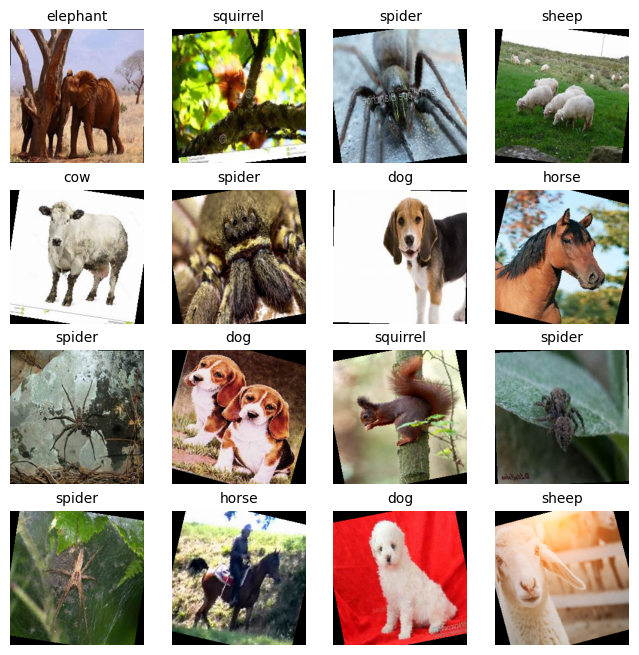

In [111]:
show_images(train_data, full_dataset.classes, num_images=16)

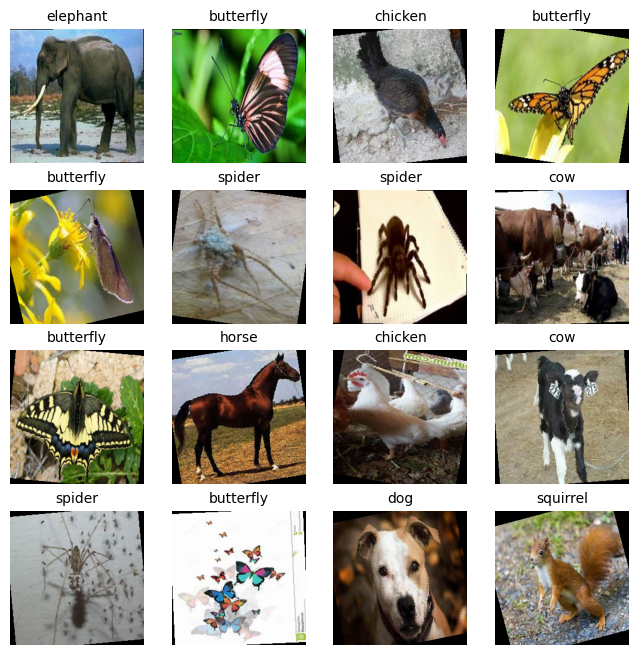

In [112]:
show_images(val_data, full_dataset.classes, num_images=16)

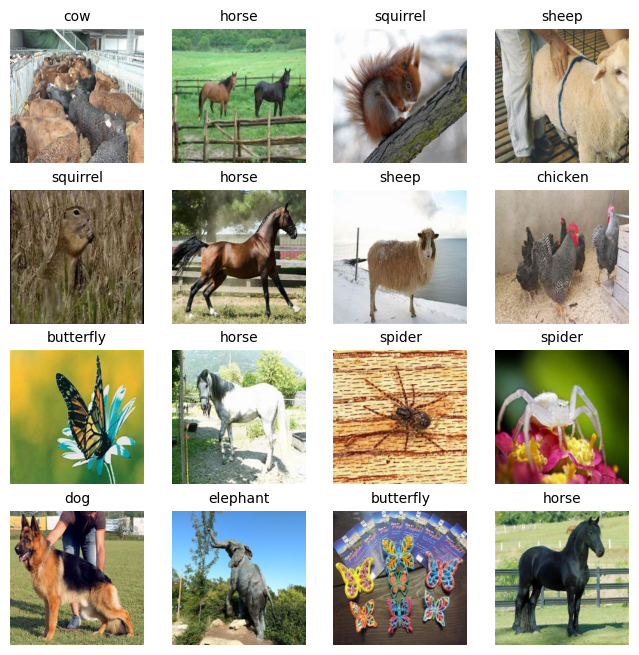

In [113]:
show_images(test_data, full_dataset.classes, num_images=16)

In [149]:
batch_size = 32

In [150]:
train_dl = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_data, batch_size=batch_size*2, shuffle=True, num_workers=2, pin_memory=True)
test_dl = DataLoader(test_data, batch_size=batch_size*2, shuffle=True, num_workers=2, pin_memory=True)